**Titanic: Machine Learning from Disaster**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.


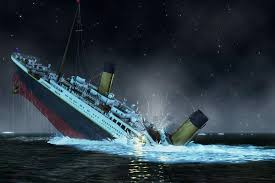

**Table of Content**

1. Importing libraries 
2. Reading dataset
3. Data Preprocessing
      * Finding columns with missing values
      * Relacing missing value with suitable statistical method
4. Exploratory Data Analysis 
      * Countplots
      * Correlation matrix
5. Survival Prediction
6. Conclusion 

**Importing Necessary Libraries**


In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the dataset**

In [166]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
train.shape # shape of the training data

(891, 12)

In [169]:
test.shape # shape of the test data

(418, 11)

### Data Prepocessing 

In [170]:
train.isnull().sum() # check the count of missing values in the train data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [171]:
train.isnull().sum() # check the count of missing values in the test data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Dealing with missing values**
1. Plot the train data in order to chech the columns that contains missing value
3. Replacing the missing values with the appropriate method 

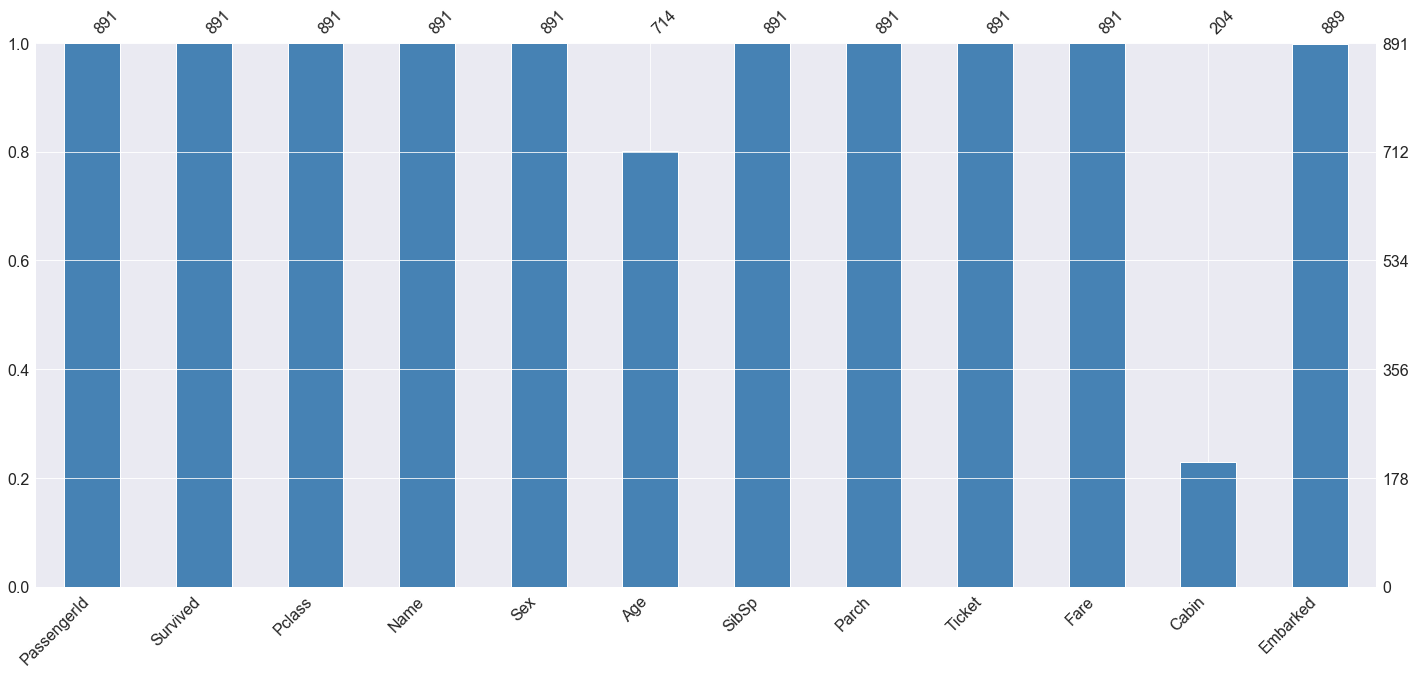

In [172]:
import missingno as msno 
msno.bar(train, color = 'steelblue')                  #Plot bar for train data

In [173]:
# Check the column which has more the 30% missing observation in training data
col = train.isnull().sum() > int(0.30 * train.shape[0]) 
col

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [174]:
# Check the column which has more the 30% missing observation in test data
col = train.isnull().sum() > int(0.30 * test.shape[0]) 
col

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [175]:
col_drop = ['Cabin']
# Drop the columns 'cabin' from training and test data as it contains more than 30% missing values
train.drop(col_drop, axis = 1, inplace = True)
test.drop(col_drop, axis = 1, inplace = True)

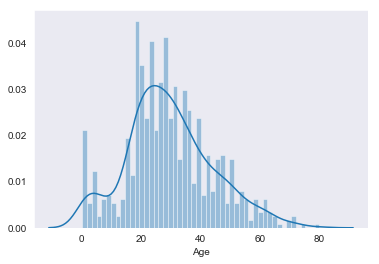

In [176]:
sns.set_style('dark')
sns.distplot(train['Age'].dropna(),hist = True, kde = True, bins = 50)

In [177]:
df = pd.DataFrame(train['Age'])
df.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [178]:
skew = (3 *(29.699 - 28))/14.5264  # Skewness = 3(mean - median)/SD
skew

0.35087840070492377

The skewness is positive. Hence we fill missing values of Age with median

In [179]:
train["Age"].fillna(train["Age"].median(), inplace = True)
test["Age"].fillna(test["Age"].median(), inplace = True)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace = True)  # 0 index to get mode the column
test["Embarked"].fillna(test["Embarked"].mode(), inplace = True)      # Data is categorical
test["Fare"].fillna(test["Fare"].mean(), inplace = True) # Only few values are missing which can be replaced with mean


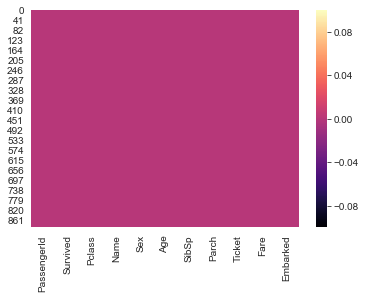

In [180]:
sns.heatmap(train.isnull(),cmap = 'magma' )

From above heatmap, it is clear that there is no missing value in the dataset. We can perform EDA now.

**Exploratory Data Analysis**

Exploratory Data Analysis is a way to understand the characteristics of dataset, identify the pattern, relationship between the variables and visualize. 

**1. Countplots of features included in the dataset**

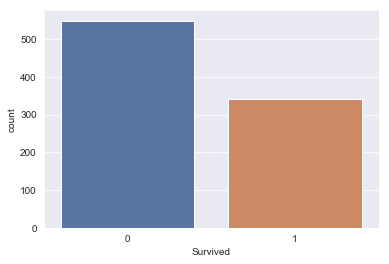

In [181]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data = train, palette = 'deep')

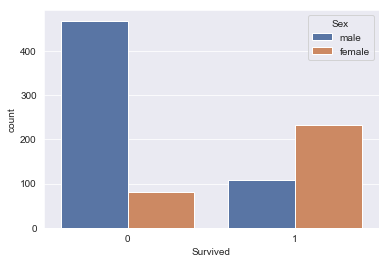

In [182]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived', hue = 'Sex' ,data = train, palette = 'deep')

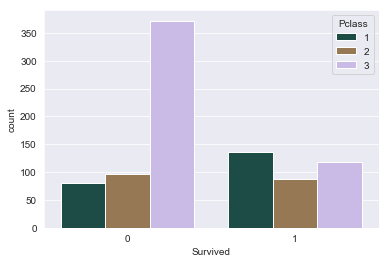

In [183]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived', hue = 'Pclass' ,data = train, palette = 'cubehelix')

**2. Correlation matrix to depict relationship between the factors**

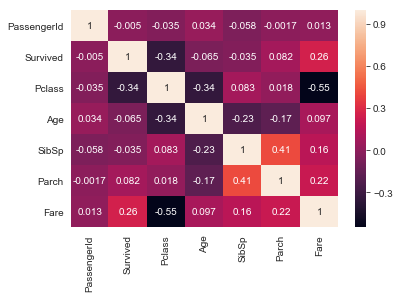

In [184]:
cor = train.corr()
sns.heatmap(cor, annot = True)

**Survival prediction by using various classification techniques**

First we need to convert the categorical variables into numeric type

In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


It is observed that Sex, Embarked and Ticket are object dtpe. So we convert these variables into numeric by using LabelEncoder.

In [186]:
from sklearn.preprocessing import LabelEncoder

In [187]:
le = LabelEncoder()

In [188]:
train['Sex1'] = le.fit_transform(train.Sex)

In [189]:
train['Embarked1'] = le.fit_transform(train.Embarked)

In [190]:
train.drop(['Name','Sex','Ticket','Embarked'],axis = 1,inplace = True)


In [191]:
train.rename(columns={"Sex1": "Sex", "Embarked1": "Embarked"},inplace = True)

In [192]:
train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1,0,3,22.0,1,0,7.2500,1,2
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,2
3,4,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,35.0,0,0,8.0500,1,2


**1. Prediction By Using Logistic Regression**

In order to predict the survival which is in the form of binary regression, Logistic Regression is the suitable technique to predict the Survival in the sinking of Titanic

### Imorting Necessary Libraries

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### *Splitting the data into train and test*

In [194]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1,3,22.0,1,0,7.2500,1,2
1,2,1,38.0,1,0,71.2833,0,0
2,3,3,26.0,0,0,7.9250,0,2
3,4,1,35.0,1,0,53.1000,0,2
4,5,3,35.0,0,0,8.0500,1,2


In [195]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.30, random_state = 100)

In [196]:
logisticModel = LogisticRegression()
logisticModel.fit(X_train,y_train)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)  #To suppress warning 

In [197]:
predict = logisticModel.predict(X_test)

In [198]:
confusionmatrix = confusion_matrix(y_test,predict)
confusionmatrix

array([[141,  18],
       [ 39,  70]], dtype=int64)

In [200]:
accuracy=accuracy_score(y_test,predict)
accuracy

0.7873134328358209

## Conclusion
The Accuracy prediction is 78.7%. 

The best suitable technique to fit a survival prediction model is Linear classification such as logistic regression, Support vector machine, Naive bayes etc. The accuracy can be further improved by using appropriate feature engineering method. The relevant features in the model plays an important role to improve the accuracy of the model. 

This was my first kaggle competition. Thank you for reading my notebook.
I really enjoyed this competition  and looking forward to climb up the leaderboard and showcase my statistical knowledge in different competitions. 

### Please upvote 